# Tuning One Parameter

To start trying to find the best possible model for classifying these images, we would like to see how different parameters affect our model individually.

## Table of Contents
1. [Baseline Data and Baseline Model](#basebase) <br>
    1.1 [Baseline Data](#basedata) <br>
    1.2 [Baseline Model](#basemodel) <br>
    1.3 [Tuning Epochs](#epochs) <br>
    _1.3.1 [50 Epochs](#50epochs) <br>_
    _1.3.2 [75 Epochs](#75epochs) <br>_
    _1.3.3 [100 Epochs](#100epochs) <br>_
    1.4 [Tuning Early Stopping](#early) <br>
    _1.4.1 [Patience 5](#5patience) <br>_
    _1.4.2 [Patience 10](#10patience) <br>_
    _1.4.3 [Patience 15](#15patience) <br>_
2. [Baseline Data and Unique Model](#baseunique) <br>
    2.1 [Tuning Number of Filters](#filters) <br>
    _2.1.1 [Double (64 and 128)](#doublefilters) <br>_
    _2.1.2 [Quad (128 and 256)](#quadfilters) <br>_
    _2.1.3 [Oct (256 and 512)](#octfilters) <br>_
    2.2 [Tuning Number of Layers](#layers) <br>
    _2.2.1 [Increasing Each Dimension By 1](#dimplusone) <br>_
    _2.2.2 [Adding a 5x5 Layer](#5by5) <br>_
    _2.2.3 [Adding a 6x6 Layer, Then a 5x5 Layer](#6by6) <br>_
    2.3 [Tuning Dropout](#dropout) <br>
    _2.3.1 [Before Flatten Layer](#flatten) <br>_
    _2.3.1 [Before Activation Layer](#activation) <br>_
3. [Unique Data and Baseline Model](#uniquebase) <br>
    3.1 [Transforming Images](#transforming) <br>
    _3.1.1 [Shift](#shift) <br>_
    _3.1.2 [Shear](#shear) <br>_
    _3.1.3 [Zoom on Training Set Only](#trainzoom) <br>_
    _3.1.4 [Zoom on All Sets](#allzoom) <br>_
    _3.1.5 [All](#all) <br>_
    3.2 [Resizing Images](#resize) <br>
    _3.2.1 [128x128](#128) <br>_
    _3.2.2 [256x256](#256) <br>_

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers
from sklearn import metrics
from matplotlib import pyplot
import metric_functions as mf
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
import tensorflow as tf

Using TensorFlow backend.


In [2]:
pip install keras --user

     |████████████████████████████████| 378kB 1.2MB/s eta 0:00:01
     |████████████████████████████████| 276kB 1.5MB/s eta 0:00:01
Failed to build pyyaml
    Running setup.py install for pyyaml ... done
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sklearn --user

     |████████████████████████████████| 7.1MB 1.5MB/s eta 0:00:01
     |████████████████████████████████| 296kB 884kB/s eta 0:00:01
Failed to build sklearn
    Running setup.py install for sklearn ... done
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install Pillow --user

     |████████████████████████████████| 2.1MB 1.4MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# Baseline Data and Baseline Model <a id='basebase'></a>

## Baseline Data <a id='basedata'></a>

For our baseline data, we grab our images from our folders, changing nothing other than putting them in the same scale. We split our data into training and validation sets to avoid overfitting.

In [2]:
train_folder = os.path.join('train')
train_pneum = os.path.join(train_folder, 'PNEUMONIA')
train_norm = os.path.join(train_folder, 'NORMAL')

test_folder = os.path.join('test')
test_pneum = os.path.join(test_folder, 'PNEUMONIA')
test_norm = os.path.join(test_folder, 'NORMAL')

val_folder = os.path.join('val')
val_pneum = os.path.join(val_folder, 'PNEUMONIA')
val_norm = os.path.join(val_folder, 'NORMAL')

In [3]:
print('There are', len(os.listdir(train_pneum)), 'pneumonia images in the train set')
print('There are', len(os.listdir(train_norm)), 'normal images in the train set')
print('There are', len(os.listdir(test_pneum)), 'pneumonia images in the test set')
print('There are', len(os.listdir(test_norm)), 'normal images in the test set')
print('There are', len(os.listdir(val_pneum)), 'pneumonia images in the val set')
print('There are', len(os.listdir(val_norm)), 'normal images in the val set')

There are 3108 pneumonia images in the train set
There are 1080 normal images in the train set
There are 390 pneumonia images in the test set
There are 234 normal images in the test set
There are 777 pneumonia images in the val set
There are 271 normal images in the val set


In [4]:
train_generator_base = ImageDataGenerator(rescale=1./255).flow_from_directory(train_folder, target_size=(64, 64), batch_size = 4188, color_mode = 'grayscale')
test_generator_base = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder, target_size=(64, 64), batch_size = 624, color_mode = 'grayscale')
val_generator_base = ImageDataGenerator(rescale=1./255).flow_from_directory(val_folder, target_size=(64, 64), batch_size = 1048, color_mode = 'grayscale')

Found 4186 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 1046 images belonging to 2 classes.


In [5]:
train_images_base, train_labels_base = next(train_generator_base)
test_images_base, test_labels_base = next(test_generator_base)
val_images_base, val_labels_base = next(val_generator_base)

In [6]:
class_labels = list(train_generator_base.class_indices.keys())
train_generator_base.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [7]:
train_labels_base

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

Our label arrays have 2 columns, one for True and one for False. We only need one of these as having two is redundant.

We see that the second index is for pneumonia. This means if there is a 0 in this column the picture is clasified as normal, and 1 if it's classified as pneumonia. Let's keep this second column as our labels.

In [8]:
print ("train_images shape: " + str(train_images_base.shape))
print ("train_labels shape: " + str(train_labels_base.shape))
print ("test_images shape: " + str(test_images_base.shape))
print ("test_labels shape: " + str(test_labels_base.shape))
print ("val_images shape: " + str(val_images_base.shape))
print ("val_labels shape: " + str(val_labels_base.shape))

train_images shape: (4186, 64, 64, 1)
train_labels shape: (4186, 2)
test_images shape: (624, 64, 64, 1)
test_labels shape: (624, 2)
val_images shape: (1046, 64, 64, 1)
val_labels shape: (1046, 2)


In [9]:
train_y_base = np.reshape(train_labels_base[:,1], (4186,1))
test_y_base = np.reshape(test_labels_base[:,1], (624,1))
val_y_base = np.reshape(val_labels_base[:,1], (1046,1))
train_y_base

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

## Baseline Model <a id='basemodel'></a>

In [10]:
model_base = models.Sequential()
model_base.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model_base.add(layers.MaxPooling2D((2, 2)))

model_base.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_base.add(layers.MaxPooling2D((2, 2)))

model_base.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_base.add(layers.MaxPooling2D((2, 2)))

model_base.add(layers.Flatten())
model_base.add(layers.Dense(64, activation='relu'))
model_base.add(layers.Dense(1, activation='sigmoid'))

model_base.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

### Training Baseline Model with Baseline Data

In [11]:
%%time
history_base = model_base.fit(train_images_base,
                    train_y_base,
                    epochs=30,
                    batch_size=50,
                    validation_data=(val_images_base, val_y_base))

Train on 4186 samples, validate on 1046 samples
Epoch 1/30
4186/4186 [==============================] - 2s 472us/step - loss: 0.5876 - acc: 0.7303 - val_loss: 0.5712 - val_acc: 0.7419
Epoch 2/30
4186/4186 [==============================] - 1s 201us/step - loss: 0.5581 - acc: 0.7422 - val_loss: 0.5623 - val_acc: 0.7419
Epoch 3/30
4186/4186 [==============================] - 1s 199us/step - loss: 0.5417 - acc: 0.7422 - val_loss: 0.5344 - val_acc: 0.7419
Epoch 4/30
4186/4186 [==============================] - 1s 201us/step - loss: 0.5069 - acc: 0.7422 - val_loss: 0.4891 - val_acc: 0.7973
Epoch 5/30
4186/4186 [==============================] - 1s 200us/step - loss: 0.4609 - acc: 0.7802 - val_loss: 0.3900 - val_acc: 0.8337
Epoch 6/30
4186/4186 [==============================] - 1s 204us/step - loss: 0.4181 - acc: 0.8204 - val_loss: 0.3927 - val_acc: 0.7859
Epoch 7/30
4186/4186 [==============================] - 1s 205us/step - loss: 0.3666 - acc: 0.8385 - val_loss: 0.2854 - val_acc: 0.8776


Accuracy 
 Train: 0.959, Test: 0.728
Loss 
 Train: 0.103, Test: 0.884 



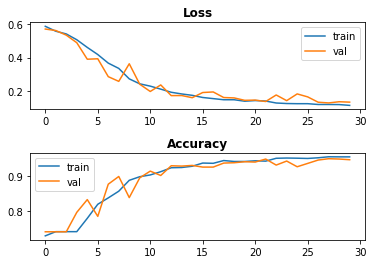



Confusion Matrix, without normalization


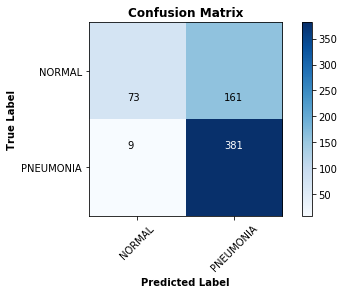



              precision    recall  f1-score   support

      NORMAL       0.89      0.31      0.46       234
   PNEUMONIA       0.70      0.98      0.82       390

    accuracy                           0.73       624
   macro avg       0.80      0.64      0.64       624
weighted avg       0.77      0.73      0.68       624



In [12]:
print(mf.evaluate_test(model_base, history_base, class_labels, train_images_base, test_images_base, train_y_base, test_y_base))

Here, we see that accuracy and loss are improving over time for both our training and validation set. This tells us our model has a good fit (not over or underfit). 

Additionally, we can see that although we have a lower precision for the pneumonia class, it has a pretty high recall. We want to make sure our models continue this trend, since we'd prefer to lose some precision over diagnosing someone who has pneumonia as normal.

## Tuning Epochs <a id='epochs'></a>
Baseline: 30

### 50 Epochs <a id='50epochs'></a>

In [13]:
model_epoch_50 = models.Sequential()
model_epoch_50.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model_epoch_50.add(layers.MaxPooling2D((2, 2)))

model_epoch_50.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_epoch_50.add(layers.MaxPooling2D((2, 2)))

model_epoch_50.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_epoch_50.add(layers.MaxPooling2D((2, 2)))

model_epoch_50.add(layers.Flatten())
model_epoch_50.add(layers.Dense(64, activation='relu'))
model_epoch_50.add(layers.Dense(1, activation='sigmoid'))

model_epoch_50.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [14]:
%%time
history_epoch_50 = model_epoch_50.fit(train_images_base,
                    train_y_base,
                    epochs=50,
                    batch_size=50,
                    validation_data=(val_images_base, val_y_base))

Train on 4186 samples, validate on 1046 samples
Epoch 1/50
4186/4186 [==============================] - 1s 237us/step - loss: 0.6186 - acc: 0.7246 - val_loss: 0.5789 - val_acc: 0.7419
Epoch 2/50
4186/4186 [==============================] - 1s 202us/step - loss: 0.5707 - acc: 0.7422 - val_loss: 0.5771 - val_acc: 0.7419
Epoch 3/50
4186/4186 [==============================] - 1s 201us/step - loss: 0.5677 - acc: 0.7422 - val_loss: 0.5707 - val_acc: 0.7419
Epoch 4/50
4186/4186 [==============================] - 1s 205us/step - loss: 0.5618 - acc: 0.7422 - val_loss: 0.5639 - val_acc: 0.7419
Epoch 5/50
4186/4186 [==============================] - 1s 205us/step - loss: 0.5535 - acc: 0.7422 - val_loss: 0.5552 - val_acc: 0.7419
Epoch 6/50
4186/4186 [==============================] - 1s 207us/step - loss: 0.5377 - acc: 0.7422 - val_loss: 0.5296 - val_acc: 0.7419
Epoch 7/50
4186/4186 [==============================] - 1s 204us/step - loss: 0.5034 - acc: 0.7430 - val_loss: 0.4767 - val_acc: 0.7438


Accuracy 
 Train: 0.969, Test: 0.739
Loss 
 Train: 0.085, Test: 0.886 



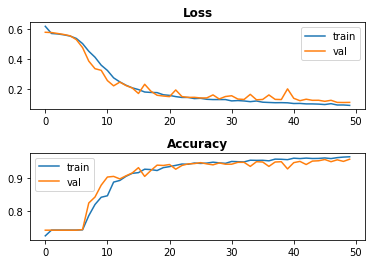



Confusion Matrix, without normalization


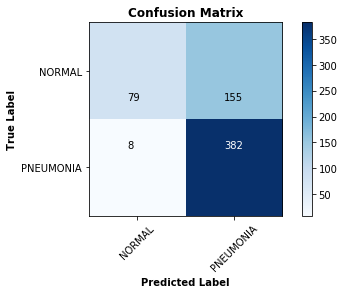



              precision    recall  f1-score   support

      NORMAL       0.91      0.34      0.49       234
   PNEUMONIA       0.71      0.98      0.82       390

    accuracy                           0.74       624
   macro avg       0.81      0.66      0.66       624
weighted avg       0.79      0.74      0.70       624



In [15]:
print(mf.evaluate_test(model_epoch_50, history_epoch_50, class_labels, train_images_base, test_images_base, train_y_base, test_y_base))

### 75 Epochs <a id='75epochs'></a>

In [16]:
model_epoch_75 = models.Sequential()
model_epoch_75.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model_epoch_75.add(layers.MaxPooling2D((2, 2)))

model_epoch_75.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_epoch_75.add(layers.MaxPooling2D((2, 2)))

model_epoch_75.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_epoch_75.add(layers.MaxPooling2D((2, 2)))

model_epoch_75.add(layers.Flatten())
model_epoch_75.add(layers.Dense(64, activation='relu'))
model_epoch_75.add(layers.Dense(1, activation='sigmoid'))

model_epoch_75.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [17]:
%%time
history_epoch_75 = model_epoch_75.fit(train_images_base,
                    train_y_base,
                    epochs=75,
                    batch_size=50,
                    validation_data=(val_images_base, val_y_base))

Train on 4186 samples, validate on 1046 samples
Epoch 1/75
4186/4186 [==============================] - 1s 232us/step - loss: 0.5960 - acc: 0.7422 - val_loss: 0.5797 - val_acc: 0.7419
Epoch 2/75
4186/4186 [==============================] - 1s 204us/step - loss: 0.5699 - acc: 0.7422 - val_loss: 0.5734 - val_acc: 0.7419
Epoch 3/75
4186/4186 [==============================] - 1s 201us/step - loss: 0.5635 - acc: 0.7422 - val_loss: 0.5647 - val_acc: 0.7419
Epoch 4/75
4186/4186 [==============================] - 1s 202us/step - loss: 0.5528 - acc: 0.7422 - val_loss: 0.5499 - val_acc: 0.7419
Epoch 5/75
4186/4186 [==============================] - 1s 200us/step - loss: 0.5334 - acc: 0.7422 - val_loss: 0.5198 - val_acc: 0.7419
Epoch 6/75
4186/4186 [==============================] - 1s 199us/step - loss: 0.4905 - acc: 0.7470 - val_loss: 0.4498 - val_acc: 0.7725
Epoch 7/75
4186/4186 [==============================] - 1s 199us/step - loss: 0.4471 - acc: 0.7922 - val_loss: 0.4206 - val_acc: 0.7572


4186/4186 [==============================] - 1s 198us/step - loss: 0.0742 - acc: 0.9730 - val_loss: 0.1169 - val_acc: 0.9541
Epoch 61/75
4186/4186 [==============================] - 1s 196us/step - loss: 0.0797 - acc: 0.9718 - val_loss: 0.0992 - val_acc: 0.9579
Epoch 62/75
4186/4186 [==============================] - 1s 197us/step - loss: 0.0721 - acc: 0.9737 - val_loss: 0.1207 - val_acc: 0.9541
Epoch 63/75
4186/4186 [==============================] - 1s 196us/step - loss: 0.0745 - acc: 0.9730 - val_loss: 0.1072 - val_acc: 0.9551
Epoch 64/75
4186/4186 [==============================] - 1s 198us/step - loss: 0.0738 - acc: 0.9725 - val_loss: 0.0992 - val_acc: 0.9551
Epoch 65/75
4186/4186 [==============================] - 1s 195us/step - loss: 0.0712 - acc: 0.9735 - val_loss: 0.0859 - val_acc: 0.9637
Epoch 66/75
4186/4186 [==============================] - 1s 195us/step - loss: 0.0692 - acc: 0.9742 - val_loss: 0.0951 - val_acc: 0.9598
Epoch 67/75
4186/4186 [==============================

Accuracy 
 Train: 0.981, Test: 0.737
Loss 
 Train: 0.055, Test: 1.038 



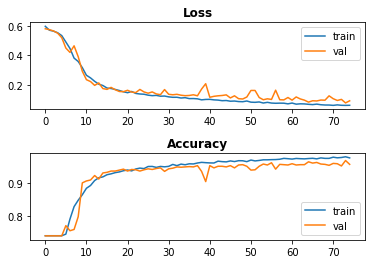



Confusion Matrix, without normalization


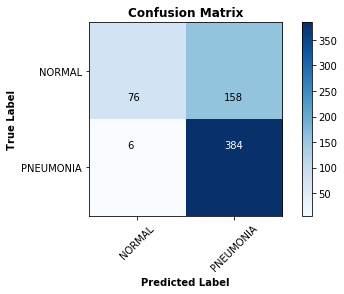



              precision    recall  f1-score   support

      NORMAL       0.93      0.32      0.48       234
   PNEUMONIA       0.71      0.98      0.82       390

    accuracy                           0.74       624
   macro avg       0.82      0.65      0.65       624
weighted avg       0.79      0.74      0.70       624



In [18]:
print(mf.evaluate_test(model_epoch_75, history_epoch_75, class_labels, train_images_base, test_images_base, train_y_base, test_y_base))

### 100 Epochs <a id='100epochs'></a>

In [19]:
model_epoch_100 = models.Sequential()
model_epoch_100.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model_epoch_100.add(layers.MaxPooling2D((2, 2)))

model_epoch_100.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_epoch_100.add(layers.MaxPooling2D((2, 2)))

model_epoch_100.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_epoch_100.add(layers.MaxPooling2D((2, 2)))

model_epoch_100.add(layers.Flatten())
model_epoch_100.add(layers.Dense(64, activation='relu'))
model_epoch_100.add(layers.Dense(1, activation='sigmoid'))

model_epoch_100.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [20]:
%%time
history_epoch_100 = model_epoch_100.fit(train_images_base,
                    train_y_base,
                    epochs=100,
                    batch_size=50,
                    validation_data=(val_images_base, val_y_base))

Train on 4186 samples, validate on 1046 samples
Epoch 1/100
4186/4186 [==============================] - 1s 234us/step - loss: 0.5898 - acc: 0.7315 - val_loss: 0.5791 - val_acc: 0.7419
Epoch 2/100
4186/4186 [==============================] - 1s 207us/step - loss: 0.5683 - acc: 0.7422 - val_loss: 0.5733 - val_acc: 0.7419
Epoch 3/100
4186/4186 [==============================] - 1s 204us/step - loss: 0.5626 - acc: 0.7422 - val_loss: 0.5642 - val_acc: 0.7419
Epoch 4/100
4186/4186 [==============================] - 1s 195us/step - loss: 0.5513 - acc: 0.7422 - val_loss: 0.5516 - val_acc: 0.7419
Epoch 5/100
4186/4186 [==============================] - 1s 197us/step - loss: 0.5325 - acc: 0.7422 - val_loss: 0.5210 - val_acc: 0.7419
Epoch 6/100
4186/4186 [==============================] - 1s 201us/step - loss: 0.4946 - acc: 0.7489 - val_loss: 0.4666 - val_acc: 0.7428
Epoch 7/100
4186/4186 [==============================] - 1s 198us/step - loss: 0.4598 - acc: 0.7843 - val_loss: 0.4538 - val_acc: 

4186/4186 [==============================] - 1s 201us/step - loss: 0.0838 - acc: 0.9711 - val_loss: 0.1021 - val_acc: 0.9589
Epoch 61/100
4186/4186 [==============================] - 1s 196us/step - loss: 0.0822 - acc: 0.9718 - val_loss: 0.1036 - val_acc: 0.9570
Epoch 62/100
4186/4186 [==============================] - 1s 198us/step - loss: 0.0817 - acc: 0.9711 - val_loss: 0.1030 - val_acc: 0.9589
Epoch 63/100
4186/4186 [==============================] - 1s 197us/step - loss: 0.0806 - acc: 0.9711 - val_loss: 0.1183 - val_acc: 0.9579
Epoch 64/100
4186/4186 [==============================] - 1s 194us/step - loss: 0.0803 - acc: 0.9704 - val_loss: 0.1010 - val_acc: 0.9579
Epoch 65/100
4186/4186 [==============================] - 1s 194us/step - loss: 0.0761 - acc: 0.9740 - val_loss: 0.1119 - val_acc: 0.9579
Epoch 66/100
4186/4186 [==============================] - 1s 196us/step - loss: 0.0755 - acc: 0.9730 - val_loss: 0.0989 - val_acc: 0.9618
Epoch 67/100
4186/4186 [=======================

Accuracy 
 Train: 0.984, Test: 0.750
Loss 
 Train: 0.046, Test: 0.949 



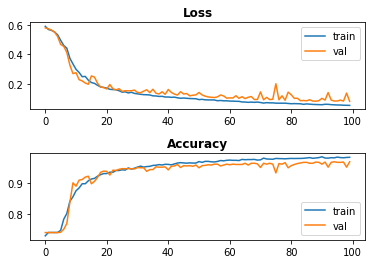



Confusion Matrix, without normalization


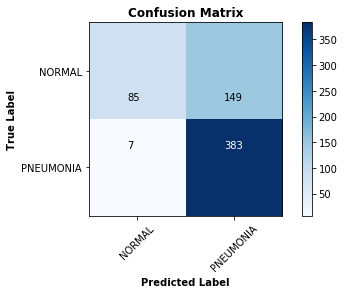



              precision    recall  f1-score   support

      NORMAL       0.92      0.36      0.52       234
   PNEUMONIA       0.72      0.98      0.83       390

    accuracy                           0.75       624
   macro avg       0.82      0.67      0.68       624
weighted avg       0.80      0.75      0.71       624



In [21]:
print(mf.evaluate_test(model_epoch_100, history_epoch_100, class_labels, train_images_base, test_images_base, train_y_base, test_y_base))

[We don't see a trend of any metric getting better off with more or less epochs. The next thing we will tune will allow the model to decide for itself when it's time to stop.]

## Early Stopping <a id='early'></a>

### Patience 5 <a id='5patience'></a>

In [22]:
model_early_5 = models.Sequential()
model_early_5.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model_early_5.add(layers.MaxPooling2D((2, 2)))

model_early_5.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_early_5.add(layers.MaxPooling2D((2, 2)))

model_early_5.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_early_5.add(layers.MaxPooling2D((2, 2)))

model_early_5.add(layers.Flatten())
model_early_5.add(layers.Dense(64, activation='relu'))
model_early_5.add(layers.Dense(1, activation='sigmoid'))

model_early_5.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [23]:
%%time
early_stopping = [EarlyStopping(monitor='val_loss', patience = 5)]
history_early_5 = model_early_5.fit(train_images_base,
                    train_y_base,
                    epochs=200,
                    batch_size=50,
                    validation_data=(val_images_base, val_y_base),
                    callbacks=early_stopping)

Train on 4186 samples, validate on 1046 samples
Epoch 1/200
4186/4186 [==============================] - 1s 226us/step - loss: 0.5965 - acc: 0.7346 - val_loss: 0.5785 - val_acc: 0.7419
Epoch 2/200
4186/4186 [==============================] - 1s 194us/step - loss: 0.5696 - acc: 0.7422 - val_loss: 0.5732 - val_acc: 0.7419
Epoch 3/200
4186/4186 [==============================] - 1s 197us/step - loss: 0.5640 - acc: 0.7422 - val_loss: 0.5659 - val_acc: 0.7419
Epoch 4/200
4186/4186 [==============================] - 1s 196us/step - loss: 0.5560 - acc: 0.7422 - val_loss: 0.5558 - val_acc: 0.7419
Epoch 5/200
4186/4186 [==============================] - 1s 205us/step - loss: 0.5414 - acc: 0.7422 - val_loss: 0.5377 - val_acc: 0.7419
Epoch 6/200
4186/4186 [==============================] - 1s 199us/step - loss: 0.5115 - acc: 0.7427 - val_loss: 0.5054 - val_acc: 0.7419
Epoch 7/200
4186/4186 [==============================] - 1s 196us/step - loss: 0.4661 - acc: 0.7697 - val_loss: 0.4017 - val_acc: 

Accuracy 
 Train: 0.968, Test: 0.726
Loss 
 Train: 0.084, Test: 0.960 



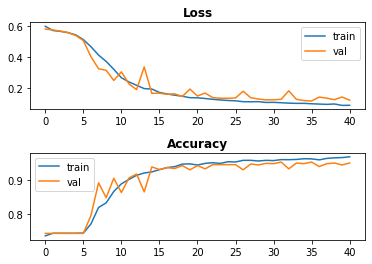



Confusion Matrix, without normalization


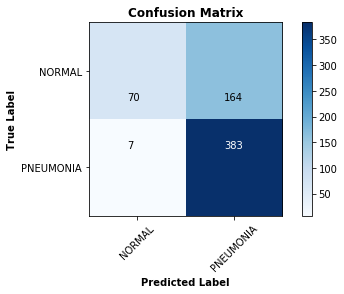



              precision    recall  f1-score   support

      NORMAL       0.91      0.30      0.45       234
   PNEUMONIA       0.70      0.98      0.82       390

    accuracy                           0.73       624
   macro avg       0.80      0.64      0.63       624
weighted avg       0.78      0.73      0.68       624



In [24]:
print(mf.evaluate_test(model_early_5, history_early_5, class_labels, train_images_base, test_images_base, train_y_base, test_y_base))

### Patience 10 <a id='10patience'></a>

In [25]:
model_early_10 = models.Sequential()
model_early_10.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model_early_10.add(layers.MaxPooling2D((2, 2)))

model_early_10.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_early_10.add(layers.MaxPooling2D((2, 2)))

model_early_10.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_early_10.add(layers.MaxPooling2D((2, 2)))

model_early_10.add(layers.Flatten())
model_early_10.add(layers.Dense(64, activation='relu'))
model_early_10.add(layers.Dense(1, activation='sigmoid'))

model_early_10.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [26]:
%%time
early_stopping = [EarlyStopping(monitor='val_loss', patience = 10)]
history_early_10 = model_early_10.fit(train_images_base,
                    train_y_base,
                    epochs=200,
                    batch_size=50,
                    validation_data=(val_images_base, val_y_base),
                    callbacks=early_stopping)

Train on 4186 samples, validate on 1046 samples
Epoch 1/200
4186/4186 [==============================] - 1s 231us/step - loss: 0.5972 - acc: 0.7279 - val_loss: 0.5782 - val_acc: 0.7419
Epoch 2/200
4186/4186 [==============================] - 1s 204us/step - loss: 0.5674 - acc: 0.7422 - val_loss: 0.5772 - val_acc: 0.7419
Epoch 3/200
4186/4186 [==============================] - 1s 205us/step - loss: 0.5581 - acc: 0.7422 - val_loss: 0.5623 - val_acc: 0.7419
Epoch 4/200
4186/4186 [==============================] - 1s 200us/step - loss: 0.5447 - acc: 0.7422 - val_loss: 0.5398 - val_acc: 0.7419
Epoch 5/200
4186/4186 [==============================] - 1s 196us/step - loss: 0.5189 - acc: 0.7427 - val_loss: 0.4999 - val_acc: 0.7486
Epoch 6/200
4186/4186 [==============================] - 1s 199us/step - loss: 0.4714 - acc: 0.7664 - val_loss: 0.4245 - val_acc: 0.7610
Epoch 7/200
4186/4186 [==============================] - 1s 202us/step - loss: 0.4446 - acc: 0.8051 - val_loss: 0.3752 - val_acc: 

4186/4186 [==============================] - 1s 198us/step - loss: 0.0755 - acc: 0.9718 - val_loss: 0.1395 - val_acc: 0.9512
Epoch 61/200
4186/4186 [==============================] - 1s 200us/step - loss: 0.0739 - acc: 0.9749 - val_loss: 0.1025 - val_acc: 0.9598
Epoch 62/200
4186/4186 [==============================] - 1s 208us/step - loss: 0.0752 - acc: 0.9718 - val_loss: 0.0966 - val_acc: 0.9618
Epoch 63/200
4186/4186 [==============================] - 1s 203us/step - loss: 0.0720 - acc: 0.9728 - val_loss: 0.1201 - val_acc: 0.9512
Epoch 64/200
4186/4186 [==============================] - 1s 199us/step - loss: 0.0748 - acc: 0.9735 - val_loss: 0.1009 - val_acc: 0.9589
Epoch 65/200
4186/4186 [==============================] - 1s 197us/step - loss: 0.0703 - acc: 0.9747 - val_loss: 0.0915 - val_acc: 0.9627
Epoch 66/200
4186/4186 [==============================] - 1s 197us/step - loss: 0.0688 - acc: 0.9737 - val_loss: 0.1335 - val_acc: 0.9512
Epoch 67/200
4186/4186 [=======================

Accuracy 
 Train: 0.978, Test: 0.724
Loss 
 Train: 0.058, Test: 1.144 



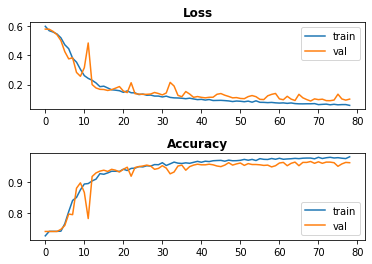



Confusion Matrix, without normalization


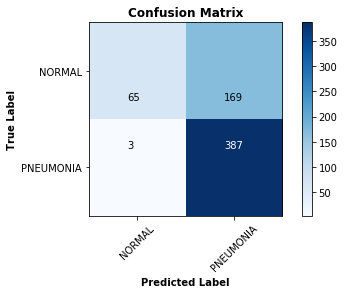



              precision    recall  f1-score   support

      NORMAL       0.96      0.28      0.43       234
   PNEUMONIA       0.70      0.99      0.82       390

    accuracy                           0.72       624
   macro avg       0.83      0.64      0.62       624
weighted avg       0.79      0.72      0.67       624



In [27]:
print(mf.evaluate_test(model_early_10, history_early_10, class_labels, train_images_base, test_images_base, train_y_base, test_y_base))

### Patience 15 <a id='15patience'></a>

In [28]:
model_early_15 = models.Sequential()
model_early_15.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model_early_15.add(layers.MaxPooling2D((2, 2)))

model_early_15.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_early_15.add(layers.MaxPooling2D((2, 2)))

model_early_15.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_early_15.add(layers.MaxPooling2D((2, 2)))

model_early_15.add(layers.Flatten())
model_early_15.add(layers.Dense(64, activation='relu'))
model_early_15.add(layers.Dense(1, activation='sigmoid'))

model_early_15.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [29]:
%%time
early_stopping = [EarlyStopping(monitor='val_loss', patience = 15)]
history_early_15 = model_early_15.fit(train_images_base,
                    train_y_base,
                    epochs=200,
                    batch_size=50,
                    validation_data=(val_images_base, val_y_base),
                    callbacks=early_stopping)

Train on 4186 samples, validate on 1046 samples
Epoch 1/200
4186/4186 [==============================] - 1s 229us/step - loss: 0.5952 - acc: 0.7274 - val_loss: 0.5763 - val_acc: 0.7419
Epoch 2/200
4186/4186 [==============================] - 1s 207us/step - loss: 0.5660 - acc: 0.7422 - val_loss: 0.5698 - val_acc: 0.7419
Epoch 3/200
4186/4186 [==============================] - 1s 201us/step - loss: 0.5589 - acc: 0.7422 - val_loss: 0.5592 - val_acc: 0.7419
Epoch 4/200
4186/4186 [==============================] - 1s 203us/step - loss: 0.5456 - acc: 0.7422 - val_loss: 0.5421 - val_acc: 0.7419
Epoch 5/200
4186/4186 [==============================] - 1s 198us/step - loss: 0.5207 - acc: 0.7422 - val_loss: 0.5231 - val_acc: 0.7419
Epoch 6/200
4186/4186 [==============================] - 1s 202us/step - loss: 0.4720 - acc: 0.7609 - val_loss: 0.4121 - val_acc: 0.8155
Epoch 7/200
4186/4186 [==============================] - 1s 199us/step - loss: 0.4388 - acc: 0.7969 - val_loss: 0.4784 - val_acc: 

4186/4186 [==============================] - 1s 199us/step - loss: 0.0818 - acc: 0.9709 - val_loss: 0.1057 - val_acc: 0.9541
Epoch 61/200
4186/4186 [==============================] - 1s 198us/step - loss: 0.0814 - acc: 0.9697 - val_loss: 0.1045 - val_acc: 0.9551
Epoch 62/200
4186/4186 [==============================] - 1s 200us/step - loss: 0.0797 - acc: 0.9687 - val_loss: 0.1183 - val_acc: 0.9551
Epoch 63/200
4186/4186 [==============================] - 1s 196us/step - loss: 0.0768 - acc: 0.9718 - val_loss: 0.1135 - val_acc: 0.9560
Epoch 64/200
4186/4186 [==============================] - 1s 200us/step - loss: 0.0765 - acc: 0.9723 - val_loss: 0.1323 - val_acc: 0.9493
Epoch 65/200
4186/4186 [==============================] - 1s 196us/step - loss: 0.0744 - acc: 0.9742 - val_loss: 0.1017 - val_acc: 0.9579
Epoch 66/200
4186/4186 [==============================] - 1s 196us/step - loss: 0.0752 - acc: 0.9723 - val_loss: 0.1085 - val_acc: 0.9570
Epoch 67/200
4186/4186 [=======================

4186/4186 [==============================] - 1s 198us/step - loss: 0.0409 - acc: 0.9838 - val_loss: 0.0834 - val_acc: 0.9637
Epoch 120/200
4186/4186 [==============================] - 1s 197us/step - loss: 0.0399 - acc: 0.9854 - val_loss: 0.1527 - val_acc: 0.9532
Epoch 121/200
4186/4186 [==============================] - 1s 197us/step - loss: 0.0398 - acc: 0.9840 - val_loss: 0.0840 - val_acc: 0.9675
Epoch 122/200
4186/4186 [==============================] - 1s 202us/step - loss: 0.0373 - acc: 0.9864 - val_loss: 0.1132 - val_acc: 0.9627
Epoch 123/200
4186/4186 [==============================] - 1s 196us/step - loss: 0.0378 - acc: 0.9849 - val_loss: 0.0933 - val_acc: 0.9646
Epoch 124/200
4186/4186 [==============================] - 1s 195us/step - loss: 0.0378 - acc: 0.9861 - val_loss: 0.1126 - val_acc: 0.9627
Epoch 125/200
4186/4186 [==============================] - 1s 201us/step - loss: 0.0379 - acc: 0.9861 - val_loss: 0.0966 - val_acc: 0.9618
Epoch 126/200
4186/4186 [================

Accuracy 
 Train: 0.990, Test: 0.736
Loss 
 Train: 0.030, Test: 1.248 



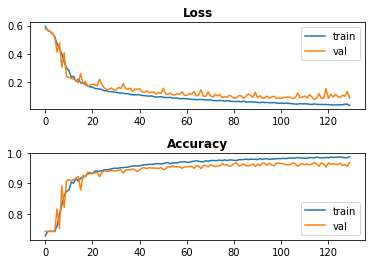



Confusion Matrix, without normalization


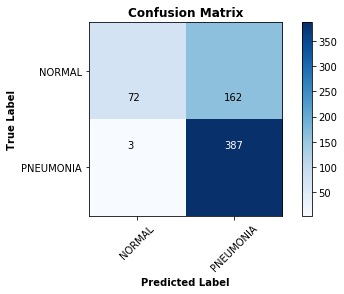



              precision    recall  f1-score   support

      NORMAL       0.96      0.31      0.47       234
   PNEUMONIA       0.70      0.99      0.82       390

    accuracy                           0.74       624
   macro avg       0.83      0.65      0.65       624
weighted avg       0.80      0.74      0.69       624



In [30]:
print(mf.evaluate_test(model_early_15, history_early_15, class_labels, train_images_base, test_images_base, train_y_base, test_y_base))

[Again, we don't see a trend between patience and model performance. We'll use early stopping in our more complex models and let the ]

# Baseline Data and Unique Model <a id='baseunique'></a>

## Tuning Number of Filters <a id='filters'></a>
Baseline: 32 and 64

### Double (64 and 128) <a id='doublefilters'></a>

In [31]:
model_filter_doub = models.Sequential()
model_filter_doub.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model_filter_doub.add(layers.MaxPooling2D((2, 2)))

model_filter_doub.add(layers.Conv2D(64, (4, 4), activation='relu'))
model_filter_doub.add(layers.MaxPooling2D((2, 2)))

model_filter_doub.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_filter_doub.add(layers.MaxPooling2D((2, 2)))

model_filter_doub.add(layers.Flatten())
model_filter_doub.add(layers.Dense(128, activation='relu'))
model_filter_doub.add(layers.Dense(1, activation='sigmoid'))

model_filter_doub.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [32]:
%%time
history_filter_doub = model_filter_doub.fit(train_images_base,
                    train_y_base,
                    epochs=30,
                    batch_size=50,
                    validation_data=(val_images_base, val_y_base))

Train on 4186 samples, validate on 1046 samples
Epoch 1/30
4186/4186 [==============================] - 2s 453us/step - loss: 0.5987 - acc: 0.7284 - val_loss: 0.5796 - val_acc: 0.7419
Epoch 2/30
4186/4186 [==============================] - 2s 363us/step - loss: 0.5672 - acc: 0.7422 - val_loss: 0.5702 - val_acc: 0.7419
Epoch 3/30
4186/4186 [==============================] - 2s 362us/step - loss: 0.5585 - acc: 0.7422 - val_loss: 0.5613 - val_acc: 0.7419
Epoch 4/30
4186/4186 [==============================] - 2s 363us/step - loss: 0.5443 - acc: 0.7422 - val_loss: 0.5390 - val_acc: 0.7419
Epoch 5/30
4186/4186 [==============================] - 2s 364us/step - loss: 0.5185 - acc: 0.7422 - val_loss: 0.4978 - val_acc: 0.7486
Epoch 6/30
4186/4186 [==============================] - 2s 363us/step - loss: 0.4617 - acc: 0.7721 - val_loss: 0.4267 - val_acc: 0.7581
Epoch 7/30
4186/4186 [==============================] - 2s 362us/step - loss: 0.4437 - acc: 0.7926 - val_loss: 0.3836 - val_acc: 0.7925


Accuracy 
 Train: 0.960, Test: 0.758
Loss 
 Train: 0.106, Test: 0.727 



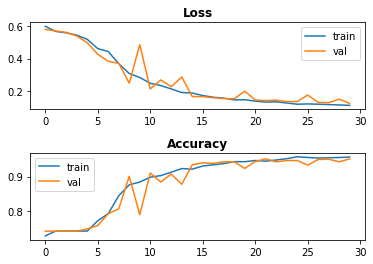



Confusion Matrix, without normalization


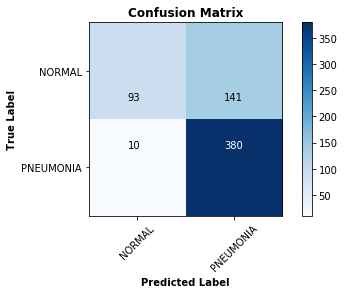



              precision    recall  f1-score   support

      NORMAL       0.90      0.40      0.55       234
   PNEUMONIA       0.73      0.97      0.83       390

    accuracy                           0.76       624
   macro avg       0.82      0.69      0.69       624
weighted avg       0.79      0.76      0.73       624



In [33]:
print(mf.evaluate_test(model_filter_doub, history_filter_doub, class_labels, train_images_base, test_images_base, train_y_base, test_y_base))

### Quad (128 and 256) <a id='quadfilters'></a>

In [34]:
model_filter_quad = models.Sequential()
model_filter_quad.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model_filter_quad.add(layers.MaxPooling2D((2, 2)))

model_filter_quad.add(layers.Conv2D(128, (4, 4), activation='relu'))
model_filter_quad.add(layers.MaxPooling2D((2, 2)))

model_filter_quad.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_filter_quad.add(layers.MaxPooling2D((2, 2)))

model_filter_quad.add(layers.Flatten())
model_filter_quad.add(layers.Dense(256, activation='relu'))
model_filter_quad.add(layers.Dense(1, activation='sigmoid'))

model_filter_quad.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [35]:
%%time
history_filter_quad = model_filter_quad.fit(train_images_base,
                    train_y_base,
                    epochs=30,
                    batch_size=50,
                    validation_data=(val_images_base, val_y_base))

Train on 4186 samples, validate on 1046 samples
Epoch 1/30
4186/4186 [==============================] - 4s 925us/step - loss: 0.5967 - acc: 0.7425 - val_loss: 0.5770 - val_acc: 0.7419
Epoch 2/30
4186/4186 [==============================] - 3s 782us/step - loss: 0.5662 - acc: 0.7422 - val_loss: 0.5697 - val_acc: 0.7419
Epoch 3/30
4186/4186 [==============================] - 3s 781us/step - loss: 0.5563 - acc: 0.7422 - val_loss: 0.5567 - val_acc: 0.7419
Epoch 4/30
4186/4186 [==============================] - 3s 779us/step - loss: 0.5420 - acc: 0.7422 - val_loss: 0.5400 - val_acc: 0.7419
Epoch 5/30
4186/4186 [==============================] - 3s 782us/step - loss: 0.5114 - acc: 0.7427 - val_loss: 0.5132 - val_acc: 0.8337
Epoch 6/30
4186/4186 [==============================] - 3s 780us/step - loss: 0.4579 - acc: 0.7726 - val_loss: 0.3982 - val_acc: 0.7945
Epoch 7/30
4186/4186 [==============================] - 3s 782us/step - loss: 0.4153 - acc: 0.8170 - val_loss: 0.3344 - val_acc: 0.8881


Accuracy 
 Train: 0.961, Test: 0.723
Loss 
 Train: 0.107, Test: 0.905 



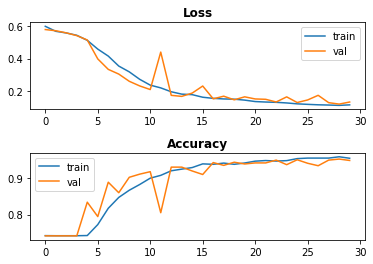



Confusion Matrix, without normalization


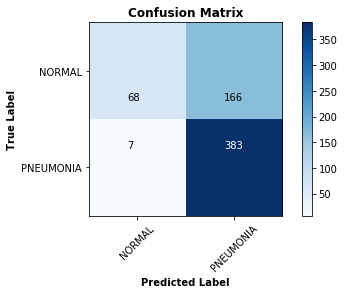



              precision    recall  f1-score   support

      NORMAL       0.91      0.29      0.44       234
   PNEUMONIA       0.70      0.98      0.82       390

    accuracy                           0.72       624
   macro avg       0.80      0.64      0.63       624
weighted avg       0.78      0.72      0.67       624



In [36]:
print(mf.evaluate_test(model_filter_quad, history_filter_quad, class_labels, train_images_base, test_images_base, train_y_base, test_y_base))

### Oct (256 and 512) <a id='octfilters'></a>

In [37]:
model_filter_oct = models.Sequential()
model_filter_oct.add(layers.Conv2D(256, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model_filter_oct.add(layers.MaxPooling2D((2, 2)))

model_filter_oct.add(layers.Conv2D(256, (4, 4), activation='relu'))
model_filter_oct.add(layers.MaxPooling2D((2, 2)))

model_filter_oct.add(layers.Conv2D(512, (3, 3), activation='relu'))
model_filter_oct.add(layers.MaxPooling2D((2, 2)))

model_filter_oct.add(layers.Flatten())
model_filter_oct.add(layers.Dense(512, activation='relu'))
model_filter_oct.add(layers.Dense(1, activation='sigmoid'))

model_filter_oct.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [38]:
%%time
history_filter_oct = model_filter_oct.fit(train_images_base,
                    train_y_base,
                    epochs=30,
                    batch_size=50,
                    validation_data=(val_images_base, val_y_base))

Train on 4186 samples, validate on 1046 samples
Epoch 1/30
4186/4186 [==============================] - 10s 2ms/step - loss: 0.5994 - acc: 0.7291 - val_loss: 0.5766 - val_acc: 0.7419
Epoch 2/30
4186/4186 [==============================] - 9s 2ms/step - loss: 0.5663 - acc: 0.7422 - val_loss: 0.5694 - val_acc: 0.7419
Epoch 3/30
4186/4186 [==============================] - 9s 2ms/step - loss: 0.5585 - acc: 0.7422 - val_loss: 0.5588 - val_acc: 0.7419
Epoch 4/30
4186/4186 [==============================] - 9s 2ms/step - loss: 0.5457 - acc: 0.7422 - val_loss: 0.5398 - val_acc: 0.7419
Epoch 5/30
4186/4186 [==============================] - 9s 2ms/step - loss: 0.5192 - acc: 0.7425 - val_loss: 0.5059 - val_acc: 0.7419
Epoch 6/30
4186/4186 [==============================] - 9s 2ms/step - loss: 0.4726 - acc: 0.7688 - val_loss: 0.4206 - val_acc: 0.8556
Epoch 7/30
4186/4186 [==============================] - 9s 2ms/step - loss: 0.4387 - acc: 0.8039 - val_loss: 0.4429 - val_acc: 0.7572
Epoch 8/30
41

Accuracy 
 Train: 0.958, Test: 0.716
Loss 
 Train: 0.113, Test: 0.955 



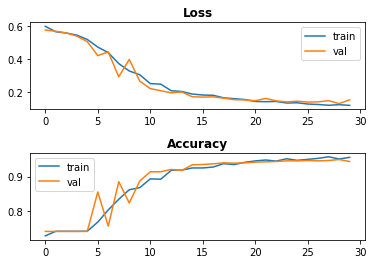



Confusion Matrix, without normalization


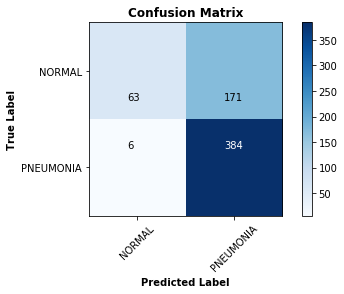



              precision    recall  f1-score   support

      NORMAL       0.91      0.27      0.42       234
   PNEUMONIA       0.69      0.98      0.81       390

    accuracy                           0.72       624
   macro avg       0.80      0.63      0.61       624
weighted avg       0.77      0.72      0.66       624



In [39]:
print(mf.evaluate_test(model_filter_oct, history_filter_oct, class_labels, train_images_base, test_images_base, train_y_base, test_y_base))

## Layers (baseline 3x3 input, 4x4 hidden, 3x3 hidden) <a id='layers'></a>

### Increasing Each Dimension By 1 <a id='dimplusone'></a>

In [40]:
model_layer_plus = models.Sequential()
model_layer_plus.add(layers.Conv2D(32, (4, 4), activation='relu', input_shape=(64, 64, 1)))
model_layer_plus.add(layers.MaxPooling2D((2, 2)))

model_layer_plus.add(layers.Conv2D(32, (5, 5), activation='relu'))
model_layer_plus.add(layers.MaxPooling2D((2, 2)))

model_layer_plus.add(layers.Conv2D(64, (4, 4), activation='relu'))
model_layer_plus.add(layers.MaxPooling2D((2, 2)))

model_layer_plus.add(layers.Flatten())
model_layer_plus.add(layers.Dense(64, activation='relu'))
model_layer_plus.add(layers.Dense(1, activation='sigmoid'))

model_layer_plus.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [41]:
%%time
history_layer_plus = model_layer_plus.fit(train_images_base,
                    train_y_base,
                    epochs=30,
                    batch_size=50,
                    validation_data=(val_images_base, val_y_base))

Train on 4186 samples, validate on 1046 samples
Epoch 1/30
4186/4186 [==============================] - 1s 278us/step - loss: 0.5876 - acc: 0.7422 - val_loss: 0.5737 - val_acc: 0.7419
Epoch 2/30
4186/4186 [==============================] - 1s 210us/step - loss: 0.5626 - acc: 0.7422 - val_loss: 0.5663 - val_acc: 0.7419
Epoch 3/30
4186/4186 [==============================] - 1s 208us/step - loss: 0.5552 - acc: 0.7422 - val_loss: 0.5567 - val_acc: 0.7419
Epoch 4/30
4186/4186 [==============================] - 1s 209us/step - loss: 0.5392 - acc: 0.7422 - val_loss: 0.5259 - val_acc: 0.7419
Epoch 5/30
4186/4186 [==============================] - 1s 207us/step - loss: 0.4992 - acc: 0.7451 - val_loss: 0.4569 - val_acc: 0.7562
Epoch 6/30
4186/4186 [==============================] - 1s 207us/step - loss: 0.4496 - acc: 0.7903 - val_loss: 0.4702 - val_acc: 0.7495
Epoch 7/30
4186/4186 [==============================] - 1s 205us/step - loss: 0.3903 - acc: 0.8237 - val_loss: 0.3029 - val_acc: 0.8843


Accuracy 
 Train: 0.956, Test: 0.768
Loss 
 Train: 0.111, Test: 0.691 



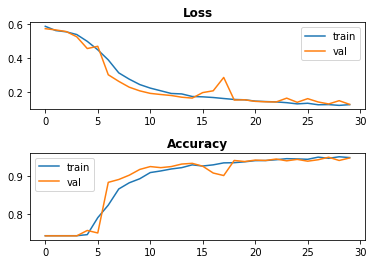



Confusion Matrix, without normalization


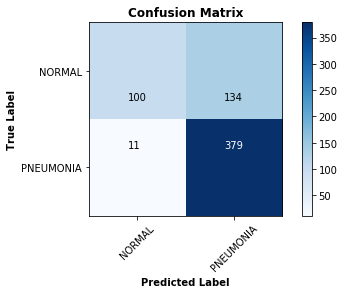



              precision    recall  f1-score   support

      NORMAL       0.90      0.43      0.58       234
   PNEUMONIA       0.74      0.97      0.84       390

    accuracy                           0.77       624
   macro avg       0.82      0.70      0.71       624
weighted avg       0.80      0.77      0.74       624



In [42]:
print(mf.evaluate_test(model_layer_plus, history_layer_plus, class_labels, train_images_base, test_images_base, train_y_base, test_y_base))

### Adding a 5x5 Layer <a id='5by5'></a>

In [43]:
model_layer_five = models.Sequential()
model_layer_five.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model_layer_five.add(layers.MaxPooling2D((2, 2)))

model_layer_five.add(layers.Conv2D(32, (5, 5), activation='relu'))
model_layer_five.add(layers.MaxPooling2D((2, 2)))

model_layer_five.add(layers.Conv2D(64, (4, 4), activation='relu'))
model_layer_five.add(layers.MaxPooling2D((2, 2)))

model_layer_five.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_layer_five.add(layers.MaxPooling2D((2, 2)))

model_layer_five.add(layers.Flatten())
model_layer_five.add(layers.Dense(64, activation='relu'))
model_layer_five.add(layers.Dense(1, activation='sigmoid'))

model_layer_five.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [44]:
%%time
history_layer_five = model_layer_five.fit(train_images_base,
                    train_y_base,
                    epochs=30,
                    batch_size=50,
                    validation_data=(val_images_base, val_y_base))

Train on 4186 samples, validate on 1046 samples
Epoch 1/30
4186/4186 [==============================] - 1s 290us/step - loss: 0.6245 - acc: 0.7422 - val_loss: 0.5788 - val_acc: 0.7419
Epoch 2/30
4186/4186 [==============================] - 1s 219us/step - loss: 0.5680 - acc: 0.7422 - val_loss: 0.5721 - val_acc: 0.7419
Epoch 3/30
4186/4186 [==============================] - 1s 220us/step - loss: 0.5656 - acc: 0.7422 - val_loss: 0.5697 - val_acc: 0.7419
Epoch 4/30
4186/4186 [==============================] - 1s 221us/step - loss: 0.5632 - acc: 0.7422 - val_loss: 0.5666 - val_acc: 0.7419
Epoch 5/30
4186/4186 [==============================] - 1s 223us/step - loss: 0.5596 - acc: 0.7422 - val_loss: 0.5666 - val_acc: 0.7419
Epoch 6/30
4186/4186 [==============================] - 1s 222us/step - loss: 0.5562 - acc: 0.7422 - val_loss: 0.5594 - val_acc: 0.7419
Epoch 7/30
4186/4186 [==============================] - 1s 222us/step - loss: 0.5490 - acc: 0.7422 - val_loss: 0.5508 - val_acc: 0.7419


Accuracy 
 Train: 0.925, Test: 0.744
Loss 
 Train: 0.177, Test: 0.600 



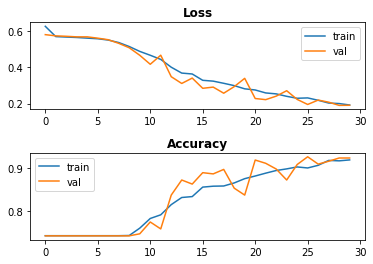



Confusion Matrix, without normalization


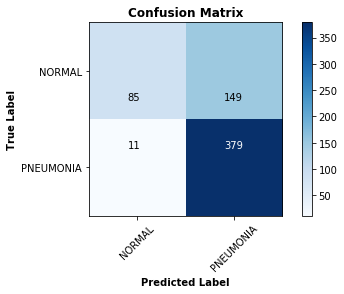



              precision    recall  f1-score   support

      NORMAL       0.89      0.36      0.52       234
   PNEUMONIA       0.72      0.97      0.83       390

    accuracy                           0.74       624
   macro avg       0.80      0.67      0.67       624
weighted avg       0.78      0.74      0.71       624



In [45]:
print(mf.evaluate_test(model_layer_five, history_layer_five, class_labels, train_images_base, test_images_base, train_y_base, test_y_base))

### Adding a 6x6 Layer, Then a 5x5 Layer (doesn't work with input_shape size) <a id='6by6'></a>

In [ ]:
model_layer_six = models.Sequential()
model_layer_six.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model_layer_six.add(layers.MaxPooling2D((2, 2)))

model_layer_six.add(layers.Conv2D(32, (6, 6), activation='relu'))
model_layer_six.add(layers.MaxPooling2D((2, 2)))

model_layer_six.add(layers.Conv2D(64, (5, 5), activation='relu'))
model_layer_six.add(layers.MaxPooling2D((2, 2)))

model_layer_six.add(layers.Conv2D(128, (4, 4), activation='relu'))
model_layer_six.add(layers.MaxPooling2D((2, 2)))

model_layer_six.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_layer_six.add(layers.MaxPooling2D((2, 2)))

model_layer_six.add(layers.Flatten())
model_layer_six.add(layers.Dense(64, activation='relu'))
model_layer_six.add(layers.Dense(1, activation='sigmoid'))

model_layer_six.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

## Tuning Dropout <a id='dropout'></a>
Baseline: none

### Before Flatten Layer <a id='flatten'></a>

In [46]:
model_dropout_flatten = models.Sequential()
model_dropout_flatten.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model_dropout_flatten.add(layers.MaxPooling2D((2, 2)))

model_dropout_flatten.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_dropout_flatten.add(layers.MaxPooling2D((2, 2)))

model_dropout_flatten.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_dropout_flatten.add(layers.MaxPooling2D((2, 2)))

model_dropout_flatten.add(Dropout(.3))
model_dropout_flatten.add(layers.Flatten())
model_dropout_flatten.add(layers.Dense(64, activation='relu'))
model_dropout_flatten.add(layers.Dense(1, activation='sigmoid'))

model_dropout_flatten.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [47]:
%%time
history_dropout_flatten = model_dropout_flatten.fit(train_images_base,
                    train_y_base,
                    epochs=30,
                    batch_size=50,
                    validation_data=(val_images_base, val_y_base))

Train on 4186 samples, validate on 1046 samples
Epoch 1/30
4186/4186 [==============================] - 1s 239us/step - loss: 0.5858 - acc: 0.7425 - val_loss: 0.5776 - val_acc: 0.7419
Epoch 2/30
4186/4186 [==============================] - 1s 208us/step - loss: 0.5663 - acc: 0.7422 - val_loss: 0.5703 - val_acc: 0.7419
Epoch 3/30
4186/4186 [==============================] - 1s 198us/step - loss: 0.5579 - acc: 0.7422 - val_loss: 0.5572 - val_acc: 0.7419
Epoch 4/30
4186/4186 [==============================] - 1s 203us/step - loss: 0.5450 - acc: 0.7422 - val_loss: 0.5368 - val_acc: 0.7419
Epoch 5/30
4186/4186 [==============================] - 1s 203us/step - loss: 0.5219 - acc: 0.7425 - val_loss: 0.5036 - val_acc: 0.7419
Epoch 6/30
4186/4186 [==============================] - 1s 203us/step - loss: 0.4822 - acc: 0.7642 - val_loss: 0.4402 - val_acc: 0.8126
Epoch 7/30
4186/4186 [==============================] - 1s 203us/step - loss: 0.4329 - acc: 0.8017 - val_loss: 0.3697 - val_acc: 0.8298


Accuracy 
 Train: 0.959, Test: 0.774
Loss 
 Train: 0.111, Test: 0.644 



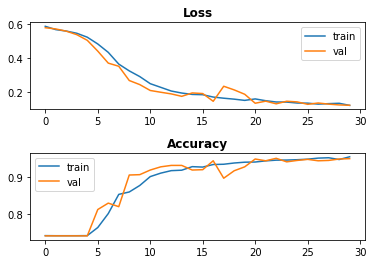



Confusion Matrix, without normalization


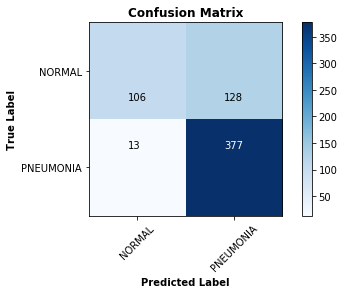



              precision    recall  f1-score   support

      NORMAL       0.89      0.45      0.60       234
   PNEUMONIA       0.75      0.97      0.84       390

    accuracy                           0.77       624
   macro avg       0.82      0.71      0.72       624
weighted avg       0.80      0.77      0.75       624



In [48]:
print(mf.evaluate_test(model_dropout_flatten, history_dropout_flatten, class_labels, train_images_base, test_images_base, train_y_base, test_y_base))

### Before Activation Layer <a id='activation'></a>

In [49]:
model_dropout_activation = models.Sequential()
model_dropout_activation.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model_dropout_activation.add(layers.MaxPooling2D((2, 2)))

model_dropout_activation.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_dropout_activation.add(layers.MaxPooling2D((2, 2)))

model_dropout_activation.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_dropout_activation.add(layers.MaxPooling2D((2, 2)))

model_dropout_activation.add(layers.Flatten())
model_dropout_activation.add(layers.Dense(64, activation='relu'))
model_dropout_activation.add(Dropout(.3))
model_dropout_activation.add(layers.Dense(1, activation='sigmoid'))

model_dropout_activation.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [50]:
%%time
history_dropout_activation = model_dropout_activation.fit(train_images_base,
                    train_y_base,
                    epochs=30,
                    batch_size=50,
                    validation_data=(val_images_base, val_y_base))

Train on 4186 samples, validate on 1046 samples
Epoch 1/30
4186/4186 [==============================] - 1s 238us/step - loss: 0.5932 - acc: 0.7403 - val_loss: 0.5777 - val_acc: 0.7419
Epoch 2/30
4186/4186 [==============================] - 1s 201us/step - loss: 0.5703 - acc: 0.7422 - val_loss: 0.5723 - val_acc: 0.7419
Epoch 3/30
4186/4186 [==============================] - 1s 202us/step - loss: 0.5668 - acc: 0.7422 - val_loss: 0.5654 - val_acc: 0.7419
Epoch 4/30
4186/4186 [==============================] - 1s 203us/step - loss: 0.5578 - acc: 0.7422 - val_loss: 0.5601 - val_acc: 0.7419
Epoch 5/30
4186/4186 [==============================] - 1s 202us/step - loss: 0.5449 - acc: 0.7422 - val_loss: 0.5356 - val_acc: 0.7419
Epoch 6/30
4186/4186 [==============================] - 1s 205us/step - loss: 0.5184 - acc: 0.7432 - val_loss: 0.4895 - val_acc: 0.7428
Epoch 7/30
4186/4186 [==============================] - 1s 203us/step - loss: 0.4661 - acc: 0.7740 - val_loss: 0.4859 - val_acc: 0.7447


Accuracy 
 Train: 0.949, Test: 0.796
Loss 
 Train: 0.134, Test: 0.586 



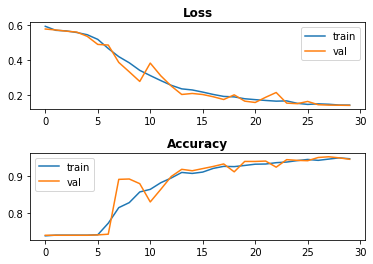



Confusion Matrix, without normalization


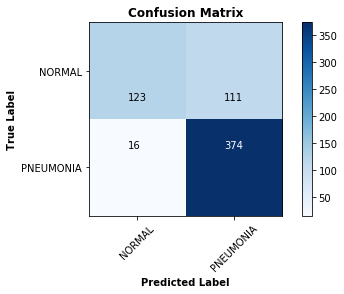



              precision    recall  f1-score   support

      NORMAL       0.88      0.53      0.66       234
   PNEUMONIA       0.77      0.96      0.85       390

    accuracy                           0.80       624
   macro avg       0.83      0.74      0.76       624
weighted avg       0.81      0.80      0.78       624



In [51]:
print(mf.evaluate_test(model_dropout_activation, history_dropout_activation, class_labels, train_images_base, test_images_base, train_y_base, test_y_base))

# Unique Data and Baseline Model <a id='uniquebase'></a>

## Transforming Images <a id='transforming'></a>
Baseline: none

### Shift <a id='shift'></a>

In [52]:
train_generator_shift = ImageDataGenerator(rescale=1./255,
                                   width_shift_range=0.1, 
                                   height_shift_range=0.1).flow_from_directory(train_folder, target_size=(64, 64), color_mode = 'grayscale', batch_size = 4188)
test_generator_shift = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder, target_size=(64, 64), color_mode = 'grayscale', batch_size = 624)
val_generator_shift = ImageDataGenerator(rescale=1./255).flow_from_directory(val_folder, target_size=(64, 64), color_mode = 'grayscale', batch_size = 1048)

Found 4186 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 1046 images belonging to 2 classes.


In [55]:
train_images_shift, train_labels_shift = next(train_generator_shift)
test_images_shift, test_labels_shift = next(test_generator_shift)
val_images_shift, val_labels_shift = next(val_generator_shift)
train_y_shift = np.reshape(train_labels_shift[:,0], (4186,1))
test_y_shift = np.reshape(test_labels_shift[:,0], (624,1))
val_y_shift = np.reshape(val_labels_shift[:,0], (1046,1))
print ("train_images shape: " + str(train_images_shift.shape))
print ("train_labels shape: " + str(train_labels_shift.shape))
print ("test_images shape: " + str(test_images_shift.shape))
print ("test_labels shape: " + str(test_labels_shift.shape))
print ("val_images shape: " + str(val_images_shift.shape))
print ("val_labels shape: " + str(val_labels_shift.shape))

train_images shape: (4186, 64, 64, 1)
train_labels shape: (4186, 2)
test_images shape: (624, 64, 64, 1)
test_labels shape: (624, 2)
val_images shape: (1046, 64, 64, 1)
val_labels shape: (1046, 2)


In [56]:
model_transform_shift = models.Sequential()
model_transform_shift.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model_transform_shift.add(layers.MaxPooling2D((2, 2)))

model_transform_shift.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_transform_shift.add(layers.MaxPooling2D((2, 2)))

model_transform_shift.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_transform_shift.add(layers.MaxPooling2D((2, 2)))

model_transform_shift.add(layers.Flatten())
model_transform_shift.add(layers.Dense(64, activation='relu'))
model_transform_shift.add(layers.Dense(1, activation='sigmoid'))

model_transform_shift.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [57]:
%%time
history_transform_shift = model_transform_shift.fit(train_images_shift,
                    train_y_shift,
                    epochs=30,
                    batch_size=50,
                    validation_data=(val_images_shift, val_y_shift))

Train on 4186 samples, validate on 1046 samples
Epoch 1/30
4186/4186 [==============================] - 1s 238us/step - loss: 0.5989 - acc: 0.7420 - val_loss: 0.5774 - val_acc: 0.7419
Epoch 2/30
4186/4186 [==============================] - 1s 199us/step - loss: 0.5697 - acc: 0.7422 - val_loss: 0.5728 - val_acc: 0.7419
Epoch 3/30
4186/4186 [==============================] - 1s 196us/step - loss: 0.5658 - acc: 0.7422 - val_loss: 0.5764 - val_acc: 0.7419
Epoch 4/30
4186/4186 [==============================] - 1s 200us/step - loss: 0.5632 - acc: 0.7422 - val_loss: 0.5634 - val_acc: 0.7419
Epoch 5/30
4186/4186 [==============================] - 1s 203us/step - loss: 0.5572 - acc: 0.7422 - val_loss: 0.5611 - val_acc: 0.7419
Epoch 6/30
4186/4186 [==============================] - 1s 204us/step - loss: 0.5490 - acc: 0.7422 - val_loss: 0.5430 - val_acc: 0.7419
Epoch 7/30
4186/4186 [==============================] - 1s 201us/step - loss: 0.5371 - acc: 0.7422 - val_loss: 0.5218 - val_acc: 0.7419


Accuracy 
 Train: 0.897, Test: 0.731
Loss 
 Train: 0.235, Test: 0.780 



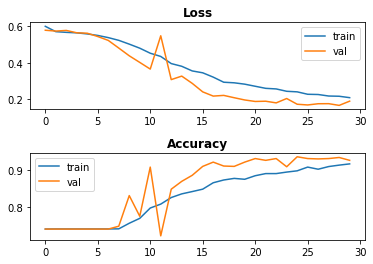



Confusion Matrix, without normalization


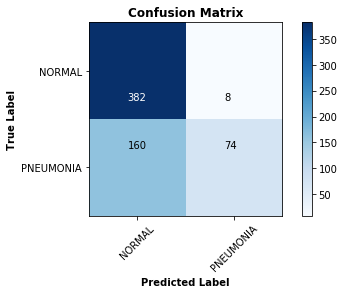



              precision    recall  f1-score   support

      NORMAL       0.70      0.98      0.82       390
   PNEUMONIA       0.90      0.32      0.47       234

    accuracy                           0.73       624
   macro avg       0.80      0.65      0.64       624
weighted avg       0.78      0.73      0.69       624



In [58]:
print(mf.evaluate_test(model_transform_shift, history_transform_shift, class_labels, train_images_shift, test_images_shift, train_y_shift, test_y_shift))

### Shear <a id='shear'></a>
Range = 15 degrees

In [59]:
train_generator_shear = ImageDataGenerator(rescale=1./255,
                                           shear_range=15).flow_from_directory(train_folder, target_size=(64, 64), color_mode = 'grayscale', batch_size = 4188)
test_generator_shear = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder, target_size=(64, 64), color_mode = 'grayscale', batch_size = 624)
val_generator_shear = ImageDataGenerator(rescale=1./255).flow_from_directory(val_folder, target_size=(64, 64), color_mode = 'grayscale', batch_size = 1048)

Found 4186 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 1046 images belonging to 2 classes.


In [60]:
train_images_shear, train_labels_shear = next(train_generator_shear)
test_images_shear, test_labels_shear = next(test_generator_shear)
val_images_shear, val_labels_shear = next(val_generator_shear)
train_y_shear = np.reshape(train_labels_shear[:,0], (4186,1))
test_y_shear = np.reshape(test_labels_shear[:,0], (624,1))
val_y_shear = np.reshape(val_labels_shear[:,0], (1046,1))
print ("train_images shape: " + str(train_images_shear.shape))
print ("train_labels shape: " + str(train_labels_shear.shape))
print ("test_images shape: " + str(test_images_shear.shape))
print ("test_labels shape: " + str(test_labels_shear.shape))
print ("val_images shape: " + str(val_images_shear.shape))
print ("val_labels shape: " + str(val_labels_shear.shape))

train_images shape: (4186, 64, 64, 1)
train_labels shape: (4186, 2)
test_images shape: (624, 64, 64, 1)
test_labels shape: (624, 2)
val_images shape: (1046, 64, 64, 1)
val_labels shape: (1046, 2)


In [61]:
model_transform_shear = models.Sequential()
model_transform_shear.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model_transform_shear.add(layers.MaxPooling2D((2, 2)))

model_transform_shear.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_transform_shear.add(layers.MaxPooling2D((2, 2)))

model_transform_shear.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_transform_shear.add(layers.MaxPooling2D((2, 2)))

model_transform_shear.add(layers.Flatten())
model_transform_shear.add(layers.Dense(64, activation='relu'))
model_transform_shear.add(layers.Dense(1, activation='sigmoid'))

model_transform_shear.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [62]:
%%time
history_transform_shear = model_transform_shear.fit(train_images_shear,
                    train_y_shear,
                    epochs=30,
                    batch_size=50,
                    validation_data=(val_images_shear, val_y_shear))

Train on 4186 samples, validate on 1046 samples
Epoch 1/30
4186/4186 [==============================] - 1s 229us/step - loss: 0.5987 - acc: 0.7422 - val_loss: 0.5792 - val_acc: 0.7419
Epoch 2/30
4186/4186 [==============================] - 1s 198us/step - loss: 0.5703 - acc: 0.7422 - val_loss: 0.5755 - val_acc: 0.7419
Epoch 3/30
4186/4186 [==============================] - 1s 199us/step - loss: 0.5665 - acc: 0.7422 - val_loss: 0.5710 - val_acc: 0.7419
Epoch 4/30
4186/4186 [==============================] - 1s 198us/step - loss: 0.5627 - acc: 0.7422 - val_loss: 0.5659 - val_acc: 0.7419
Epoch 5/30
4186/4186 [==============================] - 1s 200us/step - loss: 0.5569 - acc: 0.7422 - val_loss: 0.5593 - val_acc: 0.7419
Epoch 6/30
4186/4186 [==============================] - 1s 200us/step - loss: 0.5472 - acc: 0.7422 - val_loss: 0.5454 - val_acc: 0.7419
Epoch 7/30
4186/4186 [==============================] - 1s 200us/step - loss: 0.5280 - acc: 0.7422 - val_loss: 0.5238 - val_acc: 0.7419


Accuracy 
 Train: 0.954, Test: 0.777
Loss 
 Train: 0.127, Test: 0.628 



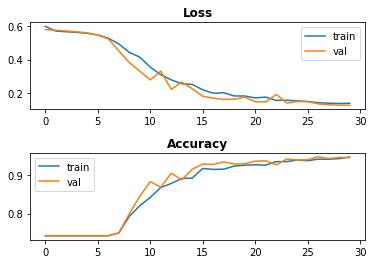



Confusion Matrix, without normalization


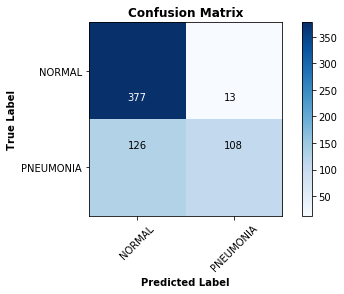



              precision    recall  f1-score   support

      NORMAL       0.75      0.97      0.84       390
   PNEUMONIA       0.89      0.46      0.61       234

    accuracy                           0.78       624
   macro avg       0.82      0.71      0.73       624
weighted avg       0.80      0.78      0.76       624



In [63]:
print(mf.evaluate_test(model_transform_shear, history_transform_shear, class_labels, train_images_shear, test_images_shear, train_y_shear, test_y_shear))

### Zoom on Training Set Only <a id='trainzoom'></a>
Range = 90%

In [64]:
train_generator_zoom_train = ImageDataGenerator(rescale=1./255,
                                           zoom_range=[.9, .9]).flow_from_directory(train_folder, target_size=(64, 64), color_mode = 'grayscale', batch_size = 4188)
test_generator_zoom_train = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder, target_size=(64, 64), color_mode = 'grayscale', batch_size = 624)
val_generator_zoom_train = ImageDataGenerator(rescale=1./255).flow_from_directory(val_folder, target_size=(64, 64), color_mode = 'grayscale', batch_size = 1048)

Found 4186 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 1046 images belonging to 2 classes.


In [65]:
train_images_zoom_train, train_labels_zoom_train = next(train_generator_zoom_train)
test_images_zoom_train, test_labels_zoom_train = next(test_generator_zoom_train)
val_images_zoom_train, val_labels_zoom_train = next(val_generator_zoom_train)
train_y_zoom_train = np.reshape(train_labels_zoom_train[:,0], (4186,1))
test_y_zoom_train = np.reshape(test_labels_zoom_train[:,0], (624,1))
val_y_zoom_train = np.reshape(val_labels_zoom_train[:,0], (1046,1))
print ("train_images shape: " + str(train_images_zoom_train.shape))
print ("train_labels shape: " + str(train_labels_zoom_train.shape))
print ("test_images shape: " + str(test_images_zoom_train.shape))
print ("test_labels shape: " + str(test_labels_zoom_train.shape))
print ("val_images shape: " + str(val_images_zoom_train.shape))
print ("val_labels shape: " + str(val_labels_zoom_train.shape))

train_images shape: (4186, 64, 64, 1)
train_labels shape: (4186, 2)
test_images shape: (624, 64, 64, 1)
test_labels shape: (624, 2)
val_images shape: (1046, 64, 64, 1)
val_labels shape: (1046, 2)


In [66]:
model_transform_zoom_train = models.Sequential()
model_transform_zoom_train.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model_transform_zoom_train.add(layers.MaxPooling2D((2, 2)))

model_transform_zoom_train.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_transform_zoom_train.add(layers.MaxPooling2D((2, 2)))

model_transform_zoom_train.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_transform_zoom_train.add(layers.MaxPooling2D((2, 2)))

model_transform_zoom_train.add(layers.Flatten())
model_transform_zoom_train.add(layers.Dense(64, activation='relu'))
model_transform_zoom_train.add(layers.Dense(1, activation='sigmoid'))

model_transform_zoom_train.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [67]:
%%time
history_transform_zoom_train = model_transform_zoom_train.fit(train_images_zoom_train,
                    train_y_zoom_train,
                    epochs=30,
                    batch_size=50,
                    validation_data=(val_images_zoom_train, val_y_zoom_train))

Train on 4186 samples, validate on 1046 samples
Epoch 1/30
4186/4186 [==============================] - 1s 232us/step - loss: 0.6162 - acc: 0.7136 - val_loss: 0.5796 - val_acc: 0.7419
Epoch 2/30
4186/4186 [==============================] - 1s 199us/step - loss: 0.5687 - acc: 0.7422 - val_loss: 0.5756 - val_acc: 0.7419
Epoch 3/30
4186/4186 [==============================] - 1s 201us/step - loss: 0.5648 - acc: 0.7422 - val_loss: 0.5706 - val_acc: 0.7419
Epoch 4/30
4186/4186 [==============================] - 1s 201us/step - loss: 0.5583 - acc: 0.7422 - val_loss: 0.5636 - val_acc: 0.7419
Epoch 5/30
4186/4186 [==============================] - 1s 198us/step - loss: 0.5496 - acc: 0.7422 - val_loss: 0.5512 - val_acc: 0.7419
Epoch 6/30
4186/4186 [==============================] - 1s 200us/step - loss: 0.5295 - acc: 0.7422 - val_loss: 0.5298 - val_acc: 0.7419
Epoch 7/30
4186/4186 [==============================] - 1s 199us/step - loss: 0.4872 - acc: 0.7508 - val_loss: 0.4668 - val_acc: 0.7524


Accuracy 
 Train: 0.942, Test: 0.804
Loss 
 Train: 0.154, Test: 0.542 



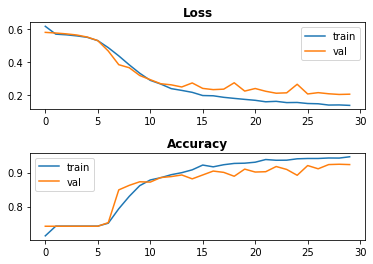



Confusion Matrix, without normalization


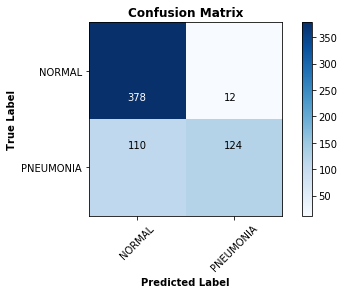



              precision    recall  f1-score   support

      NORMAL       0.77      0.97      0.86       390
   PNEUMONIA       0.91      0.53      0.67       234

    accuracy                           0.80       624
   macro avg       0.84      0.75      0.77       624
weighted avg       0.83      0.80      0.79       624



In [68]:
print(mf.evaluate_test(model_transform_zoom_train, history_transform_zoom_train, class_labels, train_images_zoom_train, test_images_zoom_train, train_y_zoom_train, test_y_zoom_train))

### Zoom on All Sets <a id='allzoom'></a>
Range = 90%

In [69]:
train_generator_zoom_all = ImageDataGenerator(rescale=1./255,
                                                zoom_range=[.9, .9]).flow_from_directory(train_folder, target_size=(64, 64), color_mode = 'grayscale', batch_size = 4188)
test_generator_zoom_all = ImageDataGenerator(rescale=1./255,
                                               zoom_range=[.9, .9]).flow_from_directory(test_folder, target_size=(64, 64), color_mode = 'grayscale', batch_size = 624)
val_generator_zoom_all = ImageDataGenerator(rescale=1./255,
                                              zoom_range=[.9, .9]).flow_from_directory(val_folder, target_size=(64, 64), color_mode = 'grayscale', batch_size = 1048)

Found 4186 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 1046 images belonging to 2 classes.


In [70]:
train_images_zoom_all, train_labels_zoom_all = next(train_generator_zoom_all)
test_images_zoom_all, test_labels_zoom_all = next(test_generator_zoom_all)
val_images_zoom_all, val_labels_zoom_all = next(val_generator_zoom_all)
train_y_zoom_all = np.reshape(train_labels_zoom_all[:,0], (4186,1))
test_y_zoom_all = np.reshape(test_labels_zoom_all[:,0], (624,1))
val_y_zoom_all = np.reshape(val_labels_zoom_all[:,0], (1046,1))
print ("train_images shape: " + str(train_images_zoom_all.shape))
print ("train_labels shape: " + str(train_labels_zoom_all.shape))
print ("test_images shape: " + str(test_images_zoom_all.shape))
print ("test_labels shape: " + str(test_labels_zoom_all.shape))
print ("val_images shape: " + str(val_images_zoom_all.shape))
print ("val_labels shape: " + str(val_labels_zoom_all.shape))

train_images shape: (4186, 64, 64, 1)
train_labels shape: (4186, 2)
test_images shape: (624, 64, 64, 1)
test_labels shape: (624, 2)
val_images shape: (1046, 64, 64, 1)
val_labels shape: (1046, 2)


In [71]:
model_transform_zoom_all = models.Sequential()
model_transform_zoom_all.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model_transform_zoom_all.add(layers.MaxPooling2D((2, 2)))

model_transform_zoom_all.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_transform_zoom_all.add(layers.MaxPooling2D((2, 2)))

model_transform_zoom_all.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_transform_zoom_all.add(layers.MaxPooling2D((2, 2)))

model_transform_zoom_all.add(layers.Flatten())
model_transform_zoom_all.add(layers.Dense(64, activation='relu'))
model_transform_zoom_all.add(layers.Dense(1, activation='sigmoid'))

model_transform_zoom_all.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [72]:
%%time
history_transform_zoom_all = model_transform_zoom_all.fit(train_images_zoom_all,
                    train_y_zoom_all,
                    epochs=30,
                    batch_size=50,
                    validation_data=(val_images_zoom_all, val_y_zoom_all))

Train on 4186 samples, validate on 1046 samples
Epoch 1/30
4186/4186 [==============================] - 1s 225us/step - loss: 0.5988 - acc: 0.7422 - val_loss: 0.5772 - val_acc: 0.7419
Epoch 2/30
4186/4186 [==============================] - 1s 197us/step - loss: 0.5692 - acc: 0.7422 - val_loss: 0.5739 - val_acc: 0.7419
Epoch 3/30
4186/4186 [==============================] - 1s 193us/step - loss: 0.5660 - acc: 0.7422 - val_loss: 0.5708 - val_acc: 0.7419
Epoch 4/30
4186/4186 [==============================] - 1s 198us/step - loss: 0.5612 - acc: 0.7422 - val_loss: 0.5647 - val_acc: 0.7419
Epoch 5/30
4186/4186 [==============================] - 1s 195us/step - loss: 0.5542 - acc: 0.7422 - val_loss: 0.5565 - val_acc: 0.7419
Epoch 6/30
4186/4186 [==============================] - 1s 196us/step - loss: 0.5423 - acc: 0.7422 - val_loss: 0.5383 - val_acc: 0.7419
Epoch 7/30
4186/4186 [==============================] - 1s 197us/step - loss: 0.5179 - acc: 0.7422 - val_loss: 0.5279 - val_acc: 0.7419


Accuracy 
 Train: 0.938, Test: 0.806
Loss 
 Train: 0.159, Test: 0.539 



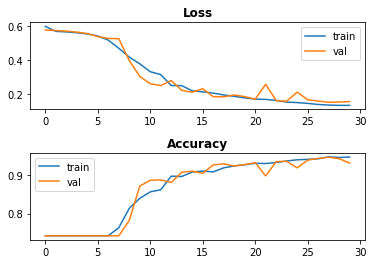



Confusion Matrix, without normalization


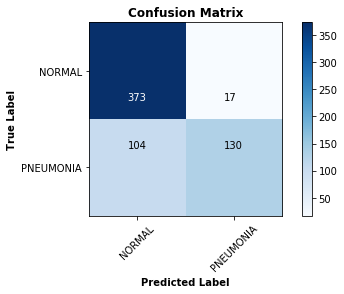



              precision    recall  f1-score   support

      NORMAL       0.78      0.96      0.86       390
   PNEUMONIA       0.88      0.56      0.68       234

    accuracy                           0.81       624
   macro avg       0.83      0.76      0.77       624
weighted avg       0.82      0.81      0.79       624



In [73]:
print(mf.evaluate_test(model_transform_zoom_all, history_transform_zoom_all, class_labels, train_images_zoom_all, test_images_zoom_all, train_y_zoom_all, test_y_zoom_all))

### All <a id='all'></a>
Shift, Shear, and Zoom

In [74]:
train_generator_transforms = ImageDataGenerator(rescale=1./255,
                                                width_shift_range=0.1,
                                                height_shift_range=0.1,
                                                shear_range=15,
                                                zoom_range=[.9, .9]).flow_from_directory(train_folder, target_size=(64, 64), color_mode = 'grayscale', batch_size = 4188)
test_generator_transforms = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder, target_size=(64, 64), color_mode = 'grayscale', batch_size = 624)
val_generator_transforms = ImageDataGenerator(rescale=1./255).flow_from_directory(val_folder, target_size=(64, 64), color_mode = 'grayscale', batch_size = 1048)

Found 4186 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 1046 images belonging to 2 classes.


In [76]:
train_images_transforms, train_labels_transforms = next(train_generator_transforms)
test_images_transforms, test_labels_transforms = next(test_generator_transforms)
val_images_transforms, val_labels_transforms = next(val_generator_transforms)
train_y_transforms = np.reshape(train_labels_transforms[:,0], (4186,1))
test_y_transforms = np.reshape(test_labels_transforms[:,0], (624,1))
val_y_transforms = np.reshape(val_labels_transforms[:,0], (1046,1))
print ("train_images shape: " + str(train_images_transforms.shape))
print ("train_labels shape: " + str(train_labels_transforms.shape))
print ("test_images shape: " + str(test_images_transforms.shape))
print ("test_labels shape: " + str(test_labels_transforms.shape))
print ("val_images shape: " + str(val_images_transforms.shape))
print ("val_labels shape: " + str(val_labels_transforms.shape))

train_images shape: (4186, 64, 64, 1)
train_labels shape: (4186, 2)
test_images shape: (624, 64, 64, 1)
test_labels shape: (624, 2)
val_images shape: (1046, 64, 64, 1)
val_labels shape: (1046, 2)


In [77]:
model_transform_combined = models.Sequential()
model_transform_combined.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model_transform_combined.add(layers.MaxPooling2D((2, 2)))

model_transform_combined.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_transform_combined.add(layers.MaxPooling2D((2, 2)))

model_transform_combined.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_transform_combined.add(layers.MaxPooling2D((2, 2)))

model_transform_combined.add(layers.Flatten())
model_transform_combined.add(layers.Dense(64, activation='relu'))
model_transform_combined.add(layers.Dense(1, activation='sigmoid'))

model_transform_combined.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [78]:
%%time
history_transform_combined = model_transform_combined.fit(train_images_transforms,
                    train_y_transforms,
                    epochs=30,
                    batch_size=50,
                    validation_data=(val_images_transforms, val_y_transforms))

Train on 4186 samples, validate on 1046 samples
Epoch 1/30
4186/4186 [==============================] - 1s 228us/step - loss: 0.5868 - acc: 0.7422 - val_loss: 0.5841 - val_acc: 0.7419
Epoch 2/30
4186/4186 [==============================] - 1s 197us/step - loss: 0.5704 - acc: 0.7422 - val_loss: 0.5789 - val_acc: 0.7419
Epoch 3/30
4186/4186 [==============================] - 1s 198us/step - loss: 0.5669 - acc: 0.7422 - val_loss: 0.5724 - val_acc: 0.7419
Epoch 4/30
4186/4186 [==============================] - 1s 197us/step - loss: 0.5619 - acc: 0.7422 - val_loss: 0.5639 - val_acc: 0.7419
Epoch 5/30
4186/4186 [==============================] - 1s 199us/step - loss: 0.5547 - acc: 0.7422 - val_loss: 0.5509 - val_acc: 0.7419
Epoch 6/30
4186/4186 [==============================] - 1s 197us/step - loss: 0.5426 - acc: 0.7422 - val_loss: 0.5276 - val_acc: 0.7419
Epoch 7/30
4186/4186 [==============================] - 1s 201us/step - loss: 0.5245 - acc: 0.7425 - val_loss: 0.4882 - val_acc: 0.7505


Accuracy 
 Train: 0.905, Test: 0.830
Loss 
 Train: 0.238, Test: 0.371 



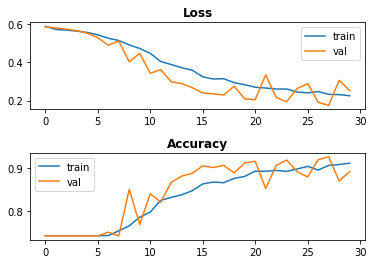



Confusion Matrix, without normalization


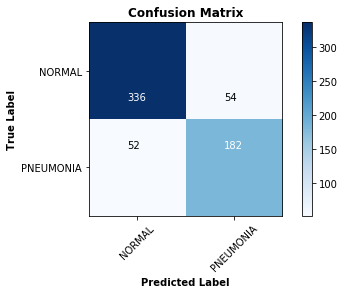



              precision    recall  f1-score   support

      NORMAL       0.87      0.86      0.86       390
   PNEUMONIA       0.77      0.78      0.77       234

    accuracy                           0.83       624
   macro avg       0.82      0.82      0.82       624
weighted avg       0.83      0.83      0.83       624



In [79]:
print(mf.evaluate_test(model_transform_combined, history_transform_combined, class_labels, train_images_transforms, test_images_transforms, train_y_transforms, test_y_transforms))

## Resizing Images <a id='resize'></a>
Baseline: 64x64

### 128x128 <a id='128'></a>

In [80]:
train_generator_128 = ImageDataGenerator(rescale=1./255).flow_from_directory(train_folder, target_size=(128, 128), color_mode = 'grayscale', batch_size = 4188)
test_generator_128 = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder, target_size=(128, 128), color_mode = 'grayscale', batch_size = 624)
val_generator_128 = ImageDataGenerator(rescale=1./255).flow_from_directory(val_folder, target_size=(128, 128), color_mode = 'grayscale', batch_size = 1048)

Found 4186 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 1046 images belonging to 2 classes.


In [81]:
train_images_128, train_labels_128 = next(train_generator_128)
test_images_128, test_labels_128 = next(test_generator_128)
val_images_128, val_labels_128 = next(val_generator_128)
train_y_128 = np.reshape(train_labels_128[:,0], (4186,1))
test_y_128 = np.reshape(test_labels_128[:,0], (624,1))
val_y_128 = np.reshape(val_labels_128[:,0], (1046,1))
print ("train_images shape: " + str(train_images_128.shape))
print ("train_labels shape: " + str(train_labels_128.shape))
print ("test_images shape: " + str(test_images_128.shape))
print ("test_labels shape: " + str(test_labels_128.shape))
print ("val_images shape: " + str(val_images_128.shape))
print ("val_labels shape: " + str(val_labels_128.shape))

train_images shape: (4186, 128, 128, 1)
train_labels shape: (4186, 2)
test_images shape: (624, 128, 128, 1)
test_labels shape: (624, 2)
val_images shape: (1046, 128, 128, 1)
val_labels shape: (1046, 2)


In [82]:
model_downsample_128 = models.Sequential()
model_downsample_128.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model_downsample_128.add(layers.MaxPooling2D((2, 2)))

model_downsample_128.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_downsample_128.add(layers.MaxPooling2D((2, 2)))

model_downsample_128.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_downsample_128.add(layers.MaxPooling2D((2, 2)))

model_downsample_128.add(layers.Flatten())
model_downsample_128.add(layers.Dense(64, activation='relu'))
model_downsample_128.add(layers.Dense(1, activation='sigmoid'))

model_downsample_128.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [83]:
%%time
history_downsample_128 = model_downsample_128.fit(train_images_128,
                    train_y_128,
                    epochs=30,
                    batch_size=50,
                    validation_data=(val_images_128, val_y_128))

Train on 4186 samples, validate on 1046 samples
Epoch 1/30
4186/4186 [==============================] - 3s 802us/step - loss: 0.5720 - acc: 0.7422 - val_loss: 0.5536 - val_acc: 0.7419
Epoch 2/30
4186/4186 [==============================] - 3s 684us/step - loss: 0.5149 - acc: 0.7506 - val_loss: 0.4861 - val_acc: 0.8891
Epoch 3/30
4186/4186 [==============================] - 3s 685us/step - loss: 0.4444 - acc: 0.8032 - val_loss: 0.5801 - val_acc: 0.6912
Epoch 4/30
4186/4186 [==============================] - 3s 682us/step - loss: 0.3717 - acc: 0.8390 - val_loss: 0.2677 - val_acc: 0.9015
Epoch 5/30
4186/4186 [==============================] - 3s 684us/step - loss: 0.2968 - acc: 0.8767 - val_loss: 0.2460 - val_acc: 0.9130
Epoch 6/30
4186/4186 [==============================] - 3s 681us/step - loss: 0.2357 - acc: 0.9037 - val_loss: 0.2332 - val_acc: 0.9082
Epoch 7/30
4186/4186 [==============================] - 3s 684us/step - loss: 0.2078 - acc: 0.9154 - val_loss: 0.1842 - val_acc: 0.9283


Accuracy 
 Train: 0.969, Test: 0.748
Loss 
 Train: 0.085, Test: 0.903 



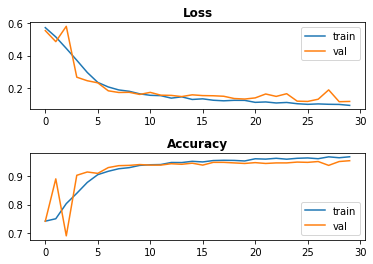



Confusion Matrix, without normalization


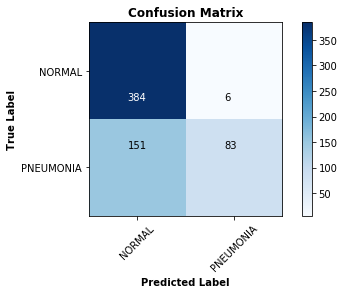



              precision    recall  f1-score   support

      NORMAL       0.72      0.98      0.83       390
   PNEUMONIA       0.93      0.35      0.51       234

    accuracy                           0.75       624
   macro avg       0.83      0.67      0.67       624
weighted avg       0.80      0.75      0.71       624



In [84]:
print(mf.evaluate_test(model_downsample_128, history_downsample_128, class_labels, train_images_128, test_images_128, train_y_128, test_y_128))

### 256x256 <a id='256'></a>

In [85]:
train_generator_256 = ImageDataGenerator(rescale=1./255).flow_from_directory(train_folder, target_size=(256, 256), color_mode = 'grayscale', batch_size = 4188)
test_generator_256 = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder, target_size=(256, 256), color_mode = 'grayscale', batch_size = 624)
val_generator_256 = ImageDataGenerator(rescale=1./255).flow_from_directory(val_folder, target_size=(256, 256), color_mode = 'grayscale', batch_size = 1048)

Found 4186 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 1046 images belonging to 2 classes.


In [86]:
train_images_256, train_labels_256 = next(train_generator_256)
test_images_256, test_labels_256 = next(test_generator_256)
val_images_256, val_labels_256 = next(val_generator_256)
train_y_256 = np.reshape(train_labels_256[:,0], (4186,1))
test_y_256 = np.reshape(test_labels_256[:,0], (624,1))
val_y_256 = np.reshape(val_labels_256[:,0], (1046,1))
print ("train_images shape: " + str(train_images_256.shape))
print ("train_labels shape: " + str(train_labels_256.shape))
print ("test_images shape: " + str(test_images_256.shape))
print ("test_labels shape: " + str(test_labels_256.shape))
print ("val_images shape: " + str(val_images_256.shape))
print ("val_labels shape: " + str(val_labels_256.shape))

train_images shape: (4186, 256, 256, 1)
train_labels shape: (4186, 2)
test_images shape: (624, 256, 256, 1)
test_labels shape: (624, 2)
val_images shape: (1046, 256, 256, 1)
val_labels shape: (1046, 2)


In [87]:
model_downsample_256 = models.Sequential()
model_downsample_256.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
model_downsample_256.add(layers.MaxPooling2D((2, 2)))

model_downsample_256.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_downsample_256.add(layers.MaxPooling2D((2, 2)))

model_downsample_256.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_downsample_256.add(layers.MaxPooling2D((2, 2)))

model_downsample_256.add(layers.Flatten())
model_downsample_256.add(layers.Dense(64, activation='relu'))
model_downsample_256.add(layers.Dense(1, activation='sigmoid'))

model_downsample_256.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

In [88]:
%%time
history_downsample_256 = model_downsample_256.fit(train_images_256,
                    train_y_256,
                    epochs=30,
                    batch_size=50,
                    validation_data=(val_images_256, val_y_256))

Train on 4186 samples, validate on 1046 samples
Epoch 1/30
4186/4186 [==============================] - 12s 3ms/step - loss: 0.5573 - acc: 0.7370 - val_loss: 0.5003 - val_acc: 0.7419
Epoch 2/30
4186/4186 [==============================] - 11s 3ms/step - loss: 0.4624 - acc: 0.7998 - val_loss: 0.3370 - val_acc: 0.9063
Epoch 3/30
4186/4186 [==============================] - 11s 3ms/step - loss: 0.3205 - acc: 0.8665 - val_loss: 0.2632 - val_acc: 0.8901
Epoch 4/30
4186/4186 [==============================] - 11s 3ms/step - loss: 0.2269 - acc: 0.9090 - val_loss: 0.2007 - val_acc: 0.9245
Epoch 5/30
4186/4186 [==============================] - 11s 3ms/step - loss: 0.1880 - acc: 0.9245 - val_loss: 0.1973 - val_acc: 0.9254
Epoch 6/30
4186/4186 [==============================] - 11s 3ms/step - loss: 0.1568 - acc: 0.9427 - val_loss: 0.1612 - val_acc: 0.9369
Epoch 7/30
4186/4186 [==============================] - 11s 3ms/step - loss: 0.1606 - acc: 0.9379 - val_loss: 0.1479 - val_acc: 0.9407
Epoch 8

Accuracy 
 Train: 0.967, Test: 0.715
Loss 
 Train: 0.081, Test: 1.261 



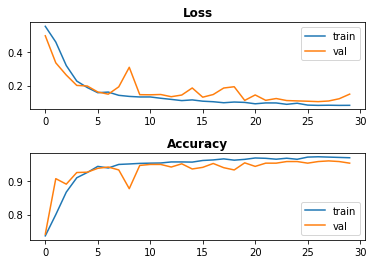



Confusion Matrix, without normalization


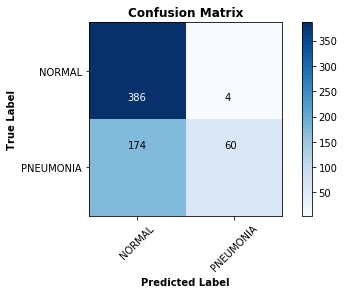



              precision    recall  f1-score   support

      NORMAL       0.69      0.99      0.81       390
   PNEUMONIA       0.94      0.26      0.40       234

    accuracy                           0.71       624
   macro avg       0.81      0.62      0.61       624
weighted avg       0.78      0.71      0.66       624



In [89]:
print(mf.evaluate_test(model_downsample_256, history_downsample_256, class_labels, train_images_256, test_images_256, train_y_256, test_y_256))